<a href="https://colab.research.google.com/github/JuliaHdzQ/APRENDIZAJE_AUTOMATICO_23_24/blob/main/practica1g08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 1**


> GRUPO A08



>Lucia Valdera Gayoso, Susana Villar Polvorosa, Julia Hernández Quintas





# Índice

 [PRÁCTICA 1](#practica-1)

   1.  [Introducción](#introduccion)
   
   2. [Enunciado del problema](#enunciado-del-problema)

   3. [Desarrollo del problema](#desarrollo-del-problema)

      3.1. [Carga y análisis de datos](#carga-y-analisis-de-datos)
   
      3.2. [Preprocesamiento de datos](#preprocesamiento-de-datos)

     3.3. [Construcción y análisis de la RNA](#construccion-y-analisis-de-la-rna)

      3.4. [Configuración y entrenamiento del modelo](#configuracion-y-entrenamiento-del-modelo)

      3.5. [Errores](#errores)

      3.6. [Ejecución de los 8 casos](#ejecucion-de-los-8-casos)

      3.7. [Análisis de resultados](#analisis-de-resultados)

   4. [Organización del proyecto](#organizacion-del-proyecto)

   5.  [Conclusión](#conclusion)




> ## Introducción  

En el mundo de la ingeniería matemática, la aplicación de técnicas de aprendizaje profundo se ha convertido en un área de estudio fundamental
y en constante evolución.

En este proyecto, nuestro grupo trabajará en la capacidad de las Redes Neuronales Artificiales (RNA) para predecir y clasificar prendas de ropa
a partir de imágenes. Para ello, utilizaremos un conjunto de datos proporcionado por Keras que contiene imágenes de moda de la tienda Zalando.

Nuestra objetivo es implementar, entrenar y evaluar ocho modelos de
RNA diferentes, con la intención de comprender mejor su funcionamiento
e implementación. Además pretendemos dejar constancia a lo largo del
proyecto de los aprendizajes, y las dificultades que nos hayan podido
surgir.





> ## Enunciado del problema


* Clasificación de imágenes de ropa en las diferentes tipologías.
* El modelo estará diseñado para hacer posteriores predicciones.

> ## Desarrollo del problema

En primer lugar, importamos la librería keras y hacemos algunas valoraciones sobre ella. Además de keras **importamos** el resto de **librerías** que vamos a utilizar a lo largo del programa

In [59]:
# Tensorflow, Keras
import tensorflow as tf
from tensorflow import keras

# Otras librerías para el procesamiento o visualización de datos
import numpy as np
import matplotlib.pyplot as plt
from keras import layers

# Prepraracion de etiquetas
from keras import utils
from keras.utils import to_categorical

# Otras librerías para el desarrollo de la RNA
from keras import models
from keras import layers

Comprobamos que la **versión de tensorflow** empleada es la 2.0.0 o superior

In [60]:
if tf.__version__ < "2.0.0":
  print('La versión de tensorflow no es la adecuada')

print(tf.__version__)

# Comprobamos también que existen GPU libres
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2.13.0
GPU Available: []


> ### **Carga y análisis de datos**

En este segundo apartado cargaremos los datos, tanto de entrenamiento como de test. El conjunto de datos empleado en este proyecto es Fashion-MNIST que contiene 70.000 imágenes de los artículos de ropa de la tienda de moda online Zalando.

In [61]:
from keras.datasets import fashion_mnist

A continuación cargamos los datos de fashion mnist que se dividen en 4 arreglos (entrenamiento y test):
* Imágenes de entrenamiento: `train_images`
* Etiquetas de las imagénes de entrenamiento: `train_labels`
* Imágenes de test: `test_images`
* Etiquetas de las imágenes de test: `test_labels`

In [62]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

Antes de comenzar cualquier proceso con la RNA, es importante estudiar y comprender bien nuestro conjunto de datos:

In [63]:
print(train_images.shape)
print(train_images[0].shape)

(60000, 28, 28)
(28, 28)


Visualizamos esta primera matriz de entrenamiento, que ya hemos comprobado que es 28 x 28

In [64]:
np.set_printoptions(precision=2,suppress=True,linewidth=145)  #limitamos decimales y suprimimos la notación científica
print(np.matrix(train_images[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

La primera imagen de nuestro conjunto de imagenes de entrenamiento es una bota, lo podemos ver aproximandamente solo con la matriz numérica.

Vamos ahora con los datos de test:

In [65]:
print("Nº de ejemplos de test:", len(test_images))
print("Forma de las etiquetas de test:", test_labels.shape)

Nº de ejemplos de test: 10000
Forma de las etiquetas de test: (10000,)


Mostramos ahora los vectores de etiquetas que guardan las clases de ropa:

In [66]:
print("Nº clases:", len(np.unique(train_labels)))
print(test_labels)
print(train_labels)

Nº clases: 10
[9 2 1 ... 8 1 5]
[9 0 0 ... 3 0 5]


Observamos que la imagen de entrenamiento nº 0 que mostramos anteriormente y que aparentaba ser una bota, se corresponde con la clase nº9

Añadimos la clasificación según el código numérico de clase, y lo comprobamos:

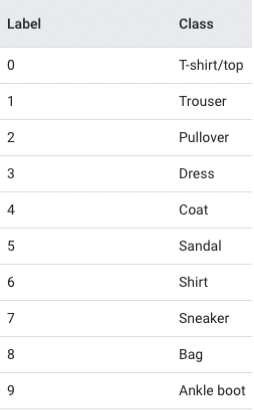

In [67]:
clases = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot' ]

Efectivamente la clase nº 9 corresponde a la prenda "boot"

Por último, mostraremos las diez primeras imágenes de entrenamiento y su etiqueta con un mapeo de colores empleando matplotlib

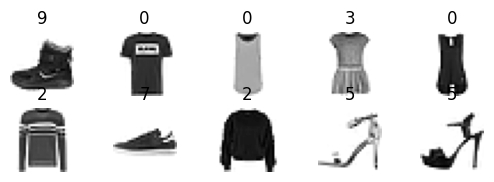

In [68]:
for i in range(10):
  plt.subplot(5, 5, i + 1)
  digit = train_images[i]
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.title(train_labels[i])
  plt.axis('off')
plt.show()

> ### **Preprocesamiento de datos**

Antes de comenzar con el entrenamiento del modelo, vamos a normalizar los valores de los pixeles que van de 0 a 255.
Para esto los dividiremos entre 255, quedando en un rango [0,1].
Con esta normalización lo que conseguimos es facilitar la convergencia del modelo con un rango más pequeño y uniforme, es por eso que decidimos normalizarlo.

In [69]:
test_images = test_images / 255
train_images = train_images / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[0]))

60000
(60000, 28, 28)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.29 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.14 0.53 0.5  0.24 0.21 0.   0.   0.   0.   0.01 0.02 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.4  0.8  0.69 0.53 0.56 0.48 0.09 0.   0.   0.   0.   0.05 0.04 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.93 0.81 0.7  0.42 0.61 0.63 0.43 0.25 0.0

El último paso antes de comenzar con el desarrollo y entrenamiento de la RNA será codificar las etiquetas de manera categórica.

Lo que haremos sera transformar la etiqueta en un vector de ceros, con un 1 en la posición del valor de esa etiqueta. Lo visualizamos a continuación.

In [70]:
train_labelscat = to_categorical(train_labels)
test_labelscat = to_categorical(test_labels)
train_labelscat[0] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# El número 30000 de entrenamiento es un 3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

En este caso, la etiqueta de entrenamiento nº 0 era = 9, Ankle boot, como vimos anteriormente.

Ahora esta etiqueta se ha convertido en un vector de ceros con valor 1 en la posición 9.

**Ideas erroneas**: en cuanto a la categorización de las etiquetas, hemos comprobado que es mejor categorizarlas para llevar a cabo el entrenamiento de nuestros modelos. Sin embargo para las representaciónes gráficas aparecían errores, pues las etiquetas deben estar sin categorizar. Para solucionar este pequeño problema hemos creado nuevas variables para nuestras etiquetas categorizadas, que solo hemos utilizado en el entrenamiento.

> ### **Construcción y análisis de la RNA**

Construimos la RNA, comenzando por las capas, que son la base principal de una red neuronal.

Un paso previo que facilita el entrenamiento e implementación de la red es convertir la entrada, que es ahora una matriz bidimensional de 28 x 28 en un vector de 28 x 28 = 784 elementos.

Esto podemos llevarlo acabo haciendo una remodelación empleando .reshape, o bien utilizando la **capa Flatten()**. Con esta modificación haremos que las capas densas puedan procesar la información de manera eficiente.

Una vez hecho esto, añadimos nuestras capas:

La capa inicial será una **capa densa** cuyo número de nodos cambiaremos en cada caso.

La **última capa** tendrá **10 nodos**, por las 10 clases del sistema. Estos 10 nodos representan las probabilidades de que la imagen de entrada sea cada una de las clases definidas al inicio. La suma de los valores de estos 10 nodos siempre deberá dar 1, pues es una probabilidad.

A continuación crearemos, entrenaremos y analizaremos 8 casos de RNA, variando el número de neuronas en la capa 1, la función de activación y el optimizador.

Para todos los casos la función de pérdida será la misma: categorical_crossentropy, asi como la métrica de precisión, y las épocas: 5.

Vemos a continuación los 8 casos:



Caso | Neuronas capa 1  | Función de activación |   Optimizador |
-----|------------------|-----------------------|---------------|
  1  |        10        |         relu          |      sgd      |
  2  |        10        |         relu          |      rmsprop      |
  3  |        10        |        sigmoid        |      sgd      |
  4  |        10        |        sigmoid        |      rmsprop      |
  5  |       512        |         relu          |      sgd      |
  6  |       512        |         relu          |      rmsprop      |
  7  |       512        |        sigmoid        |      sgd      |
  8  |       512        |        sigmoid        |      rmsprop      |

> ### **Configuración y entrenamiento del modelo**

Hemos creado un único modelo dentro de la función construcción. Esto nos permitará cambiar aquellos parámetros que queremos evaluar y analizar:

**Neuronas**: el nº de neuronas de la primera capa

**Factivación**: la función de activación deseada

**Optimizador**: el optimizador

**Épocas**: el nº epocas empleadas




 **DECISIONES**:

 1. *Capa Flatten()*: en vez de aplicar .reshape para remodelar las entradas, hemos empleado la capa Flatten que nos proporciona Keras. De esta forma el tamaño del tensor se calculará automáticamente, lo que facilitará el proceso.

 2. *Batchsize*: En cuánto al batchsize hemos tomado una decisión a base de **prueba y error**:

 Comenzamos con un número de lote de 128, con una eficiencia media de los modelos aceptable y un tiempo de ejecución relativamente corto, unos 3 seg de media en la primera época.

 La siguiente prueba que realizamos fue con un batchsize de 32, donde la eficiencia mejoró notablemente, subiendo la precisión 0.05 décimas aproximadamente respecto a el primer caso, pero sin embargo aumentó notablemente el tiempo de ejecución a casi 7.8 seg de media en la primera época.

 Por ello la decisión final fue un **tamaño de lote de 72**. La eficiencia era bastante más alta que en el primer caso, para casi todos los modelos (+0.02). El tiempo de ejecución se veía incrementado, pero no era demasiado, pues la media quedaba en 4.5s , 1.5 segundos más que con batchsize = 128.


In [71]:
def construccion(neuronas,factivacion,optimizador,epocas):

      from keras.layers import Flatten

      network = models.Sequential()

      # Agregar la capa Flatten al modelo
      network.add(Flatten(input_shape=(28, 28)))

      # Agregamos una capa con 10 neuronas y activación ReLU
      network.add(layers.Dense(neuronas, activation=factivacion, input_shape=(28*28,)))

      # Agregamos la capa de salida con 10 neuronas (para clasificación de 10 clases) y activación softmax
      network.add(layers.Dense(10, activation='softmax'))

      network.compile(optimizer=optimizador,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
      network.summary()

      # ENTRENAMIENTO DEL MODELO:
      network.fit(train_images, train_labelscat, epochs=epocas, batch_size=72)

      # EVALUACIÓN DEL MODELO CON EL CONJUNTO DE TEST:
      (test_loss, test_acc) = network.evaluate(test_images, test_labelscat)

      # PREDICCIONES CON EL CONJUNTO DE TEST
      predictions = network.predict(test_images)

      return predictions

> ### **Errores**

Nuestra primera intención fue usar un switch,con 8 casos pero lo encontramos poco práctico. Aqui dos ejemplos de nuestro código inicial:


```
def switch_case(case):

    if case == "opcion1":
        print("Elegiste la opción 1")

        # Agregamos una capa con 10 neuronas y activación ReLU
        network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))

        # Agregamos la capa de salida con 10 neuronas (para clasificación de 10 clases) y activación softmax
        network.add(layers.Dense(10, activation='softmax'))

        network.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
        network.summary()

        # ENTRENAMIENTO DEL MODELO:
        network.fit(train_images, train_labels, epochs=5, batch_size=128)


    elif case == "opcion2":
        print("Elegiste la opción 2")

        # Agregamos una capa con 10 neuronas y activación ReLU
        network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))

        # Agregamos la capa de salida con 10 neuronas (para clasificación de 10 clases) y activación softmax
        network.add(layers.Dense(10, activation='softmax'))

        network.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
        network.summary()

        # ENTRENAMIENTO DEL MODELO:
        network.fit(train_images, train_labels, epochs=5, batch_size=128)
      


```

      

También intentamos graficar dentro de la función pero el programa era mucho menos efectivo ya que a la hora de graficar 10 imagenes de cada caso habría que realizar todo lo anterior esas 10 veces.

 ```

def construccion(neuronas,factivacion,optimizador,i,epocas):

      from keras.layers import Flatten

      network = models.Sequential()

      # Agregar la capa Flatten al modelo
      network.add(Flatten(input_shape=(28, 28)))

      # Agregamos una capa con 10 neuronas y activación ReLU
      network.add(layers.Dense(neuronas, activation=factivacion, input_shape=(28*28,)))

      # Agregamos la capa de salida con 10 neuronas (para clasificación de 10 clases) y activación softmax
      network.add(layers.Dense(10, activation='softmax'))

      network.compile(optimizer=optimizador,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
      network.summary()

      # ENTRENAMIENTO DEL MODELO:
      network.fit(train_images, train_labelscat, epochs=epocas, batch_size=128)

      # EVALUACIÓN DEL MODELO:
      (test_loss, test_acc) = network.evaluate(test_images, test_labelscat)

      # PREDICCIONES CON IMAGENES DE TEST
      predictions = network.predict(test_images)
      print(predictions[i])

      plt.figure(figsize=(2,3))
      plt.subplot(1,2,1)
      plot_image(0, prediction, [true_label], [test_image])

      plt.subplot(1,2,2)
      plot_value_array(0, prediction, [true_label])
      plt.show()


      return predictions # Devolvemos las predicciones de todas las imagenes del caso que se este evaluando


> ### **Ejecución de los 8 casos**

En este punto, ejecutamos los 8 modelos (función construcción) en un bucle for, y guardamos las predicciones de cada uno de ellos en un vector resultados, que nos facilitará el posterior estudio gráfico sin necesidad de volver a crear y entrenar los modelos.

In [72]:
casos = [
    (10, 'relu', 'sgd', 5),
    (10, 'relu', 'rmsprop', 5),
    (10, 'sigmoid', 'sgd', 5),
    (10, 'sigmoid', 'rmsprop', 5),
    (512, 'relu', 'sgd', 5),
    (512, 'relu', 'rmsprop', 5),
    (512, 'sigmoid', 'sgd', 5),
    (512, 'sigmoid', 'rmsprop', 5),
] # Realizamos una matriz de cadenas y numeros con los datos requeridos en cada caso

resultados = []  # Lista para almacenar los resultados de la función construccion
# Iterar a través de los casos y llamar a la función construccion
j = 1

for caso in casos:
    print('\n' + '-'*60 + '\n')
    print(f"CASO {j}:")
    print('\n' + '-'*60 + '\n')
    j=j+1
    predictions =[]
    neuronas, factivacion, optimizador, epocas = caso
    predictions = construccion(neuronas, factivacion, optimizador, epocas)
    resultados.append((predictions))



------------------------------------------------------------

CASO 1:

------------------------------------------------------------

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 10)                7850      
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
834/834 [==============================] - 2s 2ms/step - loss: 1.2312 - accuracy: 0.5829
Epoch 2/5
834/834 [==============================]

>  **MENCIONES TEÓRICAS**

**Función de activación:**

 Comenzamos comentando cada función de activación.

 \\

*Función de Activación Rectificada Lineal (ReLU):*

La función de activación ReLU se define matemáticamente como

\begin{equation}
f(x)=max(0,x)
\end{equation}

 siendo una funcion no lineal que rectifica los valores, dando el valor 0 a aquellos valores que sean negativos, y conservando los positivos. Una de las ventajas clave de esta función es su capacidad para promover la no linealidad en la red, lo cual es crucial para aprender patrones complejos.


 Podemos destacar además, que ReLU se implementa en las capas ocultas de la red neuronal, no en las capas de salida.

\\

Las principales ventajas de ReLU son la simplicidad en el cálculo y el Esparcimiento de la representación.

Respecto a la simplicidad en el cálculo esta funcion de activación no requiere operaciones exponenciales en su implementación.

Su otra fortaleza es la capacidad de generar salidas con valores cero reales, es decir, que al generar una salida cero con los valores negativos, se facilita la creacion de capas ocultas con uno o más valores cero reales.  Este concepto, denominado representación dispersa, simplifica el modelo y acelera el proceso de aprendizaje.

A pesar de sus beneficios, ReLU puede experimentar el problema conocido como "dying ReLU", donde ciertas neuronas pueden volverse inactivas y siempre emitir cero, lo que puede afectar negativamente el rendimiento del modelo en ciertos escenarios.

\\




*Función Sigmoide (Sigmoid):*

La Función de Activación Sigmoide, representada como

\begin{equation}
f(x)=\frac{1}{1+e^-x}
\end{equation}

mapea cualquier valor real a un rango entre 0 y 1, siendo especialmente útil en la capa de salida de modelos de clasificación binaria, donde se busca obtener una probabilidad. Además, es eficaz para modelar distribuciones de probabilidad.

\\

Sus principales ventajas son su utilidad en la clasificación binaria, pues produce salidas en el rango de probabilidad entre 0 y 1, facilitando la interpretación como probabilidades; el modelado de distribuciones de probabilida, ya que, como hemos comentado antes, sus salidas estan acotadas entre 0 y 1; y su derivabilidad, ya que la funcion sigmoide es continua y derivable, lo que facilita la aplicación de técnicas como la propagación hacia atrás (Back Propagation) en las redes neuronales.

Sin embargo, esta funcion experimenta el problema de desaparición del gradiente en redes profundas, lo que dificulta el entrenamiento efectivo al hacer que los gradientes sean muy pequeños. Además, tiende a saturar y matar el gradiente, lo que conlleva a una convergencia más lenta en comparación con funciones como ReLU. La falta de centralización en cero afecta la eficiencia del aprendizaje, especialmente en redes más profundas. Además, su tiempo de computación es más alto que el de funciones más simples, lo que puede afectar el rendimiento general de la red, especialmente en aplicaciones que requieren un procesamiento rápido.

\\



**Optimizador**:

Sgd, un algoritmo fundamental, ajusta iterativamente los parámetros del modelo utilizando gradientes calculados en lotes de datos. Es simple y eficiente, pero puede ser ruidoso y tener problemas de convergencia en datos complejos.

RMSprop, una variante, adapta la tasa de aprendizaje para cada parámetro individualmente, lo que ayuda a superar desafíos de convergencia y curvaturas complicadas. Aunque RMSprop introduce hiperparámetros adicionales, puede ser preferido en casos de gradientes cambiantes.

\\



> ### **Análisis de resultados**

**COMPARACIÓN MODELOS (P1)**

Hablando de las funciones de activación podemos decir que el rendimiento es relativamente más bajo en los modelos con Sigmoid, sin embargo ambas funciones han mostrado un buen rendimiento, las diferencias más significativas en los resultados no son exclusivamente atribuibles a la eleccion de la funcion de activación.

Los modelos con ReLU parecen funcionar especialmente bien en combinación con el optimizador RMSprop.

En los modelos con Sigmoid vemos mas variación en los resultados (podemos destacar el modelo con 10 neuronas y SGD, el cual muestra un rendimiento inferior).Pero, por lo general, tambien ha mostrado buen rendimiento con el optimizador rmsprop.

Cuando hablamos del numero de neuronas, podemos decir que los modelos con 512 neuronas tienden a tener mejor precisión que los modelos con 10. Aumentar el número de neuronas parece contribuir positivamente al rendimiento del modelo.


El modelo con 512 neuronas, ReLU y RMSprop será el que tenga una mayor precisión de entre los modelos que hemos entrenado.


\\


**SALIDA COMANDO SUMMARY (P2)**

La salida de network.summary() proporciona información sobre la arquitectura de la red neuronal, incluidas las capas, la forma de salida de cada capa y el número de parámetros entrenables en la red.


Podemos diferenciar dos casos que se repiten a lo largo de los ochos modelos: los casos donde tenemos 10 neuronas y los casos en donde tenemos 512:


\\

CASOS CON 10 NEURONAS

*   Las redes constan de una capa de aplanamiento ('flatten') y dos capas densas.
*   La capa de aplanamiento no tiene parámetros entrenables.

*   La primera capa densa tiene 784 * 10 + 10 = 7850 parámetros.
*   La segunda capa densa tiene 10 * 10 + 10 = 110 parámetros.
*    Total de parámetros: 7960.

\\

CASOS CON 512 NEURONAS

*   Las redes constan de una capa de aplanamiento ('flatten') y dos capas densas.
*   La capa de aplanamiento no tiene parámetros entrenables.

*   La primera capa densa ahora tiene 784 * 512 + 512 = 401920 parámetros.
*   La segunda capa densa tiene 512 * 10 + 10 = 5130 parámetros.
*    Total de parámetros: 407050.

\\

> **EVALUACION DE MODELOS CON EL CONJUNTO DE TEST (P4)**

En este tercer apartado vamos a valorar la precisión que han obtenido cada uno de los modelos para los datos de test (10.000 imágenes). Antes es importante aclarar dos conceptos:

1. *Loss*: será el valor del error entre las predicciones de nuestro modelo, y el valor real en el datatest (test_labels), es decir nos permite saber cuánto de malas han sido las predicciones erroneas.
Esto es especialmente importante en aquellos modelos en los que sea clave valorar el error y no tanto el acierto.

El modelo que tiene una tasa de error muy alta es el modelo 3, cuya perdida es de un 1.02, el resto de modelos no superan el 0.5


2. *Accuracy*: la proporción de predicciones correctas que realiza nuestro modelo, en referencia a las etiquetas del conjunto de test o prueba. Se calcula dividiendo las predicciones acertadas entre los casos totales (10.000)

En nuestro caso, la mayoría de los modelos tienen una precisión de acierto bastante alta, superando casi todos el 80 %. Esto significa que de nuestras 10.000 imágenes de test nuestros modelos aciertan 8.000

No es así con los modelos 3 y 7 cuyas estadísticas de acierto son de 0.7 y 0.77 respectivamente.

Por ello concluimos que en general nuestros modelos predicen bastante bien las imágenes de test.

*OVERFITTING*

Cabe mencionar también que existe muy poca diferencia entre la precisión del modelo al finalizar el entrenamiento, con imágenes de entrenamiento y la precisión que obtienen nuestros modelos al evaluarse con imágenes que nunca antes habían visto.

Esto es muy importante porque nos indica que nuestros modelos no se han **sobreentrenado**.



> **MODELOS 2 Y 7 CON 25 ÉPOCAS (P3)**

En este punto, vamos a crear y entrenar los modelos 2 y 7, esta vez cambiando el número de épocas a 25.

Compararemos los resultados con los modelos 2 y 7 originales.

In [73]:
print('\n' + '-'*60 + '\n')
print ( "CASO 2 ORIGINAL")
print('\n' + '-'*60 + '\n')
P = []

P=construccion(10,'relu','rmsprop',5)
print('\n''\n')

print('\n' + '-'*60 + '\n')
P = print ("CASO 2 CON 25 ÉPOCAS")
print('\n' + '-'*60 + '\n')

P=construccion(10,'relu','rmsprop',5*5)

print('\n''\n')




------------------------------------------------------------

CASO 2 ORIGINAL

------------------------------------------------------------

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_34 (Flatten)        (None, 784)               0         
                                                                 
 dense_68 (Dense)            (None, 10)                7850      
                                                                 
 dense_69 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
834/834 [==============================] - 2s 2ms/step - loss: 0.7308 - accuracy: 0.7563
Epoch 2/5
834/834 [=======================

In [74]:
print('\n' + '-'*60 + '\n')
print ("CASO 7  ORIGINAL")
print('\n' + '-'*60 + '\n')


P=construccion(512,'sigmoid','sgd',5)
print('\n''\n')

print('\n' + '-'*60 + '\n')
print ("CASO 7 CON 25 ÉPOCAS")
print('\n' + '-'*60 + '\n')


P=construccion(512,'sigmoid','sgd',5*5)
print('\n''\n')


------------------------------------------------------------

CASO 7  ORIGINAL

------------------------------------------------------------

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 512)               401920    
                                                                 
 dense_73 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
834/834 [==============================] - 7s 9ms/step - loss: 1.4483 - accuracy: 0.6388
Epoch 2/5
834/834 [====================

En el primer caso(2) la eficiencia utilizando 25 épocas aumenta en 0.02 décimas. El aumento no es demasiado grande teniendo en cuenta que al aumentar el número de épocas aumenta inevitablemente el tiempo de ejecución.

En el segundo caso (7) la eficiencia con 25 épocas aumenta bastante más, casi 0.05 décimas, por lo que aquí a pesar de que el tiempo de ejecución aumente, puede ser beneficioso ampliar el número de épocas ya que el modelo si será mucho más eficiente.

Aún asi esto dependerá de las necesidades del modelo, si se prioriza la precisión de acierto se establecerán 25 épocas, mientras que si queremos menos tiempo de ejecución se mantendran 5 épocas.

> **PREDICCIONES 6º IMAGEN TEST (P5)**

En este apartado mostramos las predicciones que cada modelo ha obtenido en la imagen número 6 del conjunto de test.

A continuación aparecen el modelo empleado, y la salida para dicha imagen, que será un vector de probabilidades, cuya suma de elementos será 1.

In [75]:
i = 1

print('\n' + '-'*60 + '\n')

for resultado in resultados:
  predicción = []
  predicción = resultado
  print(f"La predicción del modelo {i}:")
  print (predicción[5])
  print('\n' + '-'*60 + '\n')
  i+=1


------------------------------------------------------------

La predicción del modelo 1:
[0.01 0.97 0.   0.   0.02 0.   0.   0.   0.   0.  ]

------------------------------------------------------------

La predicción del modelo 2:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

------------------------------------------------------------

La predicción del modelo 3:
[0.06 0.59 0.06 0.12 0.06 0.02 0.06 0.03 0.01 0.  ]

------------------------------------------------------------

La predicción del modelo 4:
[0.02 0.95 0.   0.02 0.   0.   0.   0.   0.   0.  ]

------------------------------------------------------------

La predicción del modelo 5:
[0.01 0.98 0.   0.   0.01 0.   0.   0.   0.   0.  ]

------------------------------------------------------------

La predicción del modelo 6:
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

------------------------------------------------------------

La predicción del modelo 7:
[0.02 0.91 0.01 0.02 0.03 0.   0.01 0.   0.   0.  ]

--------------------------------------

Comprobamos que en todos los modelos la probabilidad más alta recae sobre el elemento 2 del vector.

Además en todos los modelos predicen que la figura 6 es un pantalón (2) con probabilidades mayor a un 90 %, excepto el modelo 3, que como ya habíamos observado es el menos eficiente.

Visualizemos la figura 6 del conjunto de imágenes de test y comprobamos que efectivamente sea un pantalón:

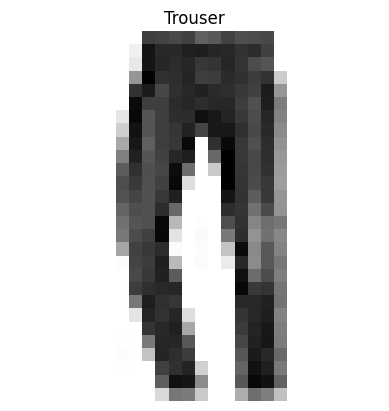

In [76]:
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
#plt.title(test_label[5])
plt.title(clases[test_labels[5]])
plt.axis('off')
plt.show()

Por tanto concluimos que todos los modelos predicen bien esta imagen. No obstante el pantalon es una imagen relativamente fácil de diferenciar por su forma, más distinta al resto de prendas, pero analizaremos las predicciones de nuestros modelos para algunos casos más.

> **GRÁFICAMOS EL COMPORTAMIENTO DE LOS MODELOS (P6)**

A continuación procedemos a graficar las predicciones de nuestros modelos para las 10 primeras imágenes de test.

Para ello insertamos dos **funciones** imprescincibles a la hora de graficar:


In [77]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  print(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [78]:
def plot_result(test_image, prediction, true_label): #función que llama a las funciones para mostrar tanto la imagen como la gráfica
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(0, prediction, [true_label], [test_image])

    plt.subplot(1,2,2)
    plot_value_array(0, prediction, [true_label])
    plt.show()

Una vez definidas las funciones procedemos a graficar los resultados de los 8 modelos, para las 10 primeras imágenes de prueba.

El gráfico de barras nos muestra el porcenaje con el que el modelo predice esa clase para la imagen correspondiente. El gráfico sadrá en negro si la clase con mayor porcentaje es la correcta, y de no ser así saldra en rojo.


------------------------------------------------------------

MODELO 1

------------------------------------------------------------




--> Imagen 1



9


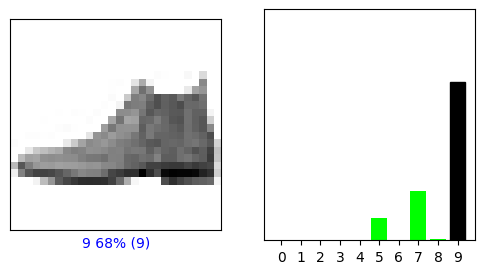




--> Imagen 2



2


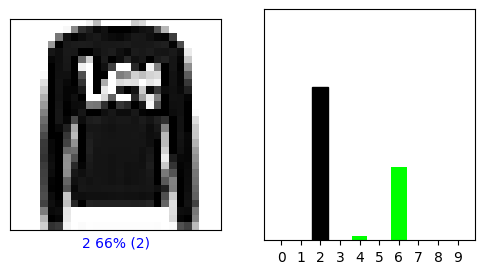




--> Imagen 3



1


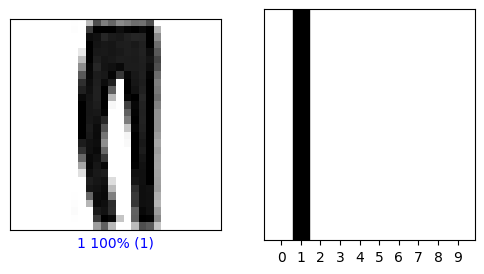




--> Imagen 4



1


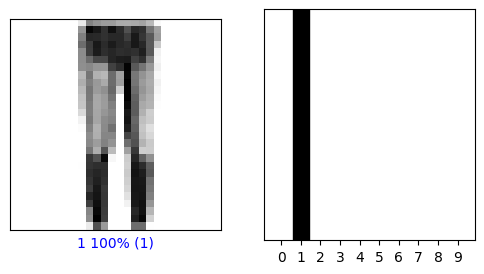




--> Imagen 5



6


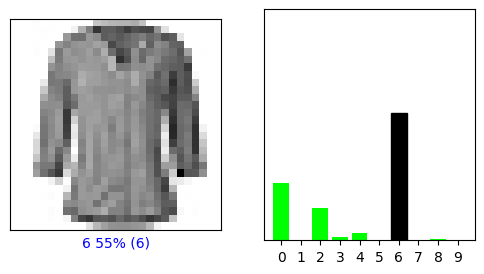




--> Imagen 6



1


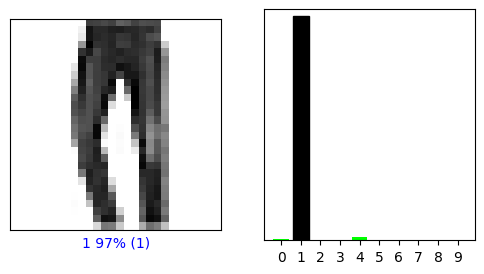




--> Imagen 7



4


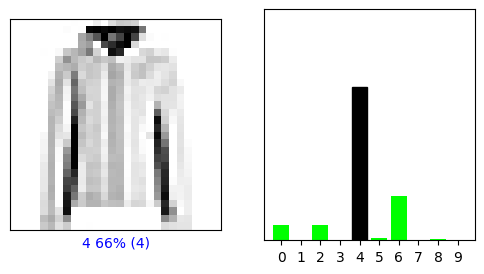




--> Imagen 8



6


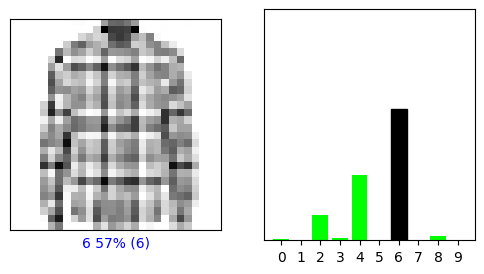




--> Imagen 9



5


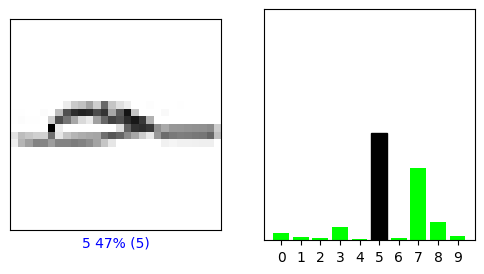

In [79]:
print('\n' + '-'*60 + '\n')
print('MODELO 1')
print('\n' + '-'*60 + '\n')
predictions = resultados[0] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])


El modelo 1 ha acertado en un 100 % de las primeras 10 imágnes de test. Los pantalones son la prenda de ropa que acierta con más seguridad.


------------------------------------------------------------

MODELO 2

------------------------------------------------------------




--> Imagen 1



9


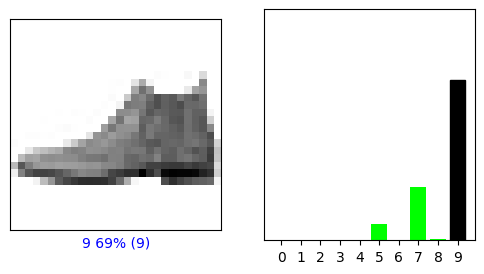




--> Imagen 2



2


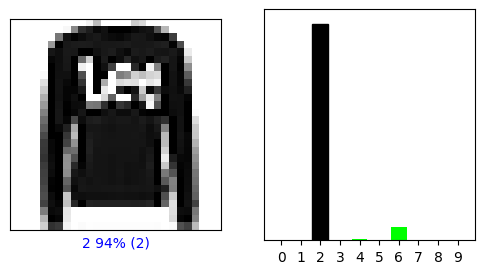




--> Imagen 3



1


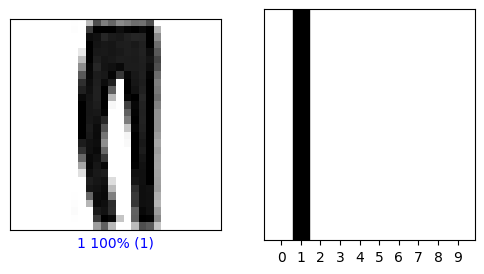




--> Imagen 4



1


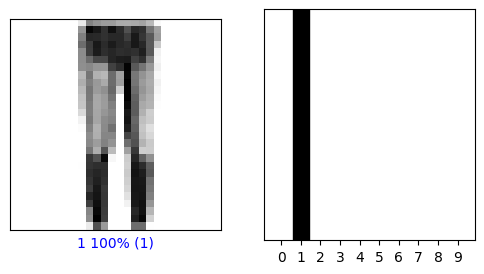




--> Imagen 5



6


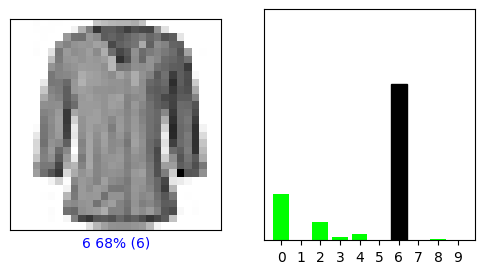




--> Imagen 6



1


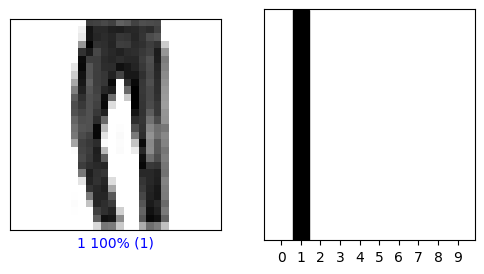




--> Imagen 7



4


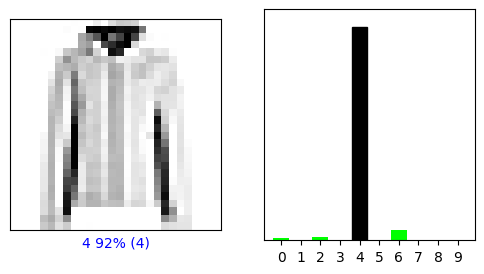




--> Imagen 8



6


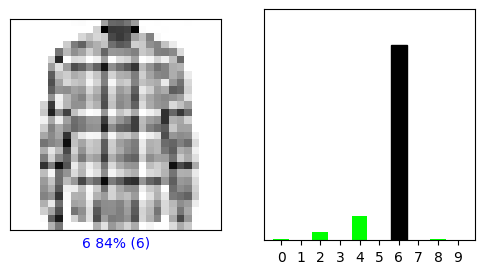




--> Imagen 9



5


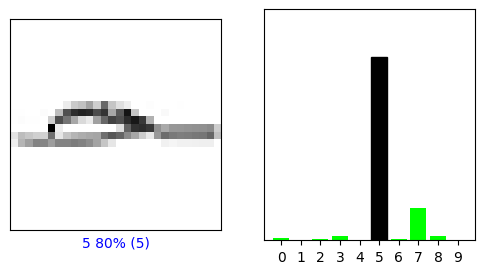

In [80]:
print('\n' + '-'*60 + '\n')
print('MODELO 2')
print('\n' + '-'*60 + '\n')
predictions = resultados[1] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])




El modelo 2 también ha acertado en las 10 imagénes de prueba. Los pantalones también tienen un acierto muy alto, con una 98-100 % de probabilidad de que la imagen sea de la clase pantalón.

Las clases 4,6,2 (pullover,coat,shirt) son las clases que más confunde, pues son prendas de ropa con formas muy similares.


------------------------------------------------------------

MODELO 3

------------------------------------------------------------




--> Imagen 1



9


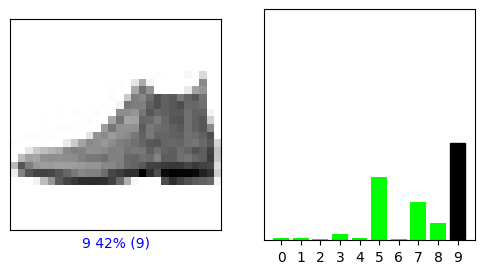




--> Imagen 2



2


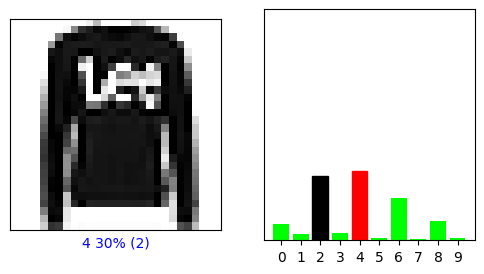




--> Imagen 3



1


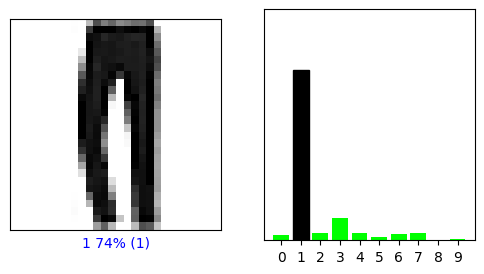




--> Imagen 4



1


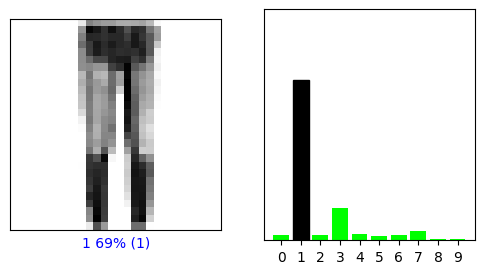




--> Imagen 5



6


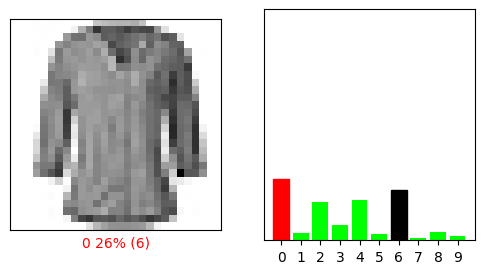




--> Imagen 6



1


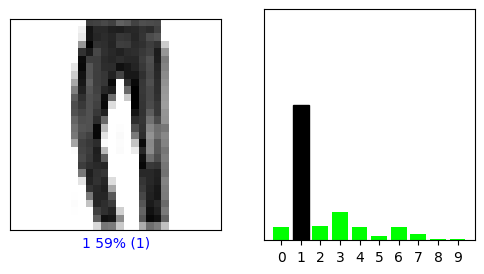




--> Imagen 7



4


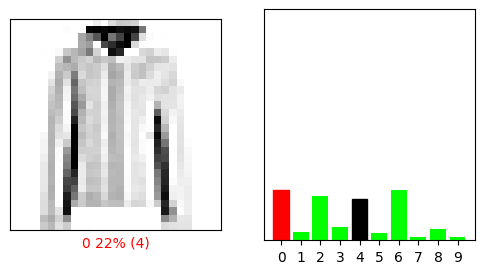




--> Imagen 8



6


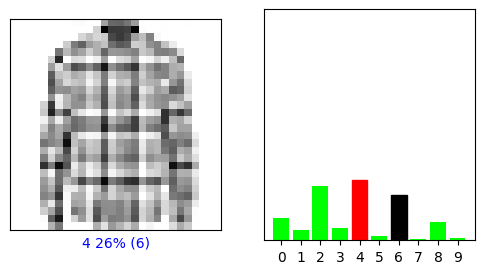




--> Imagen 9



5


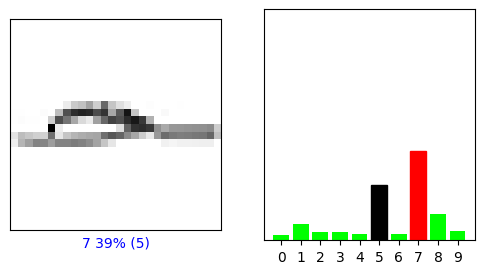

In [81]:
print('\n' + '-'*60 + '\n')
print('MODELO 3')
print('\n' + '-'*60 + '\n')
predictions = resultados[2] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])




En este 3º modelo, que ya corroboramos como menos eficiente toma 3 fallos. En la 7 y 8 imagen confunde las clases 6 y 4 (coat,shirt).

Además en la útima imagen también confunde una sandalia con un sneaker (41%).


------------------------------------------------------------

MODELO 4

------------------------------------------------------------




--> Imagen 1



9


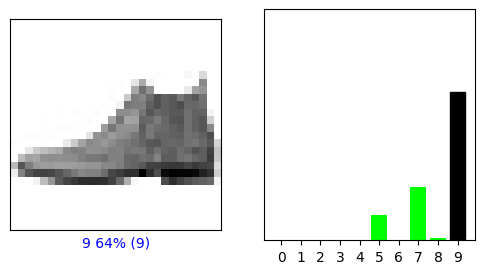




--> Imagen 2



2


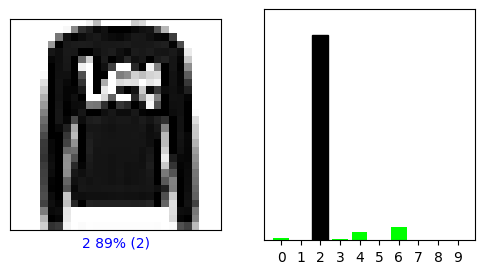




--> Imagen 3



1


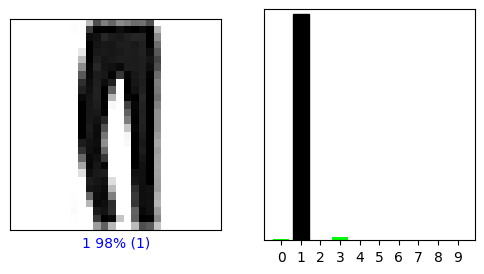




--> Imagen 4



1


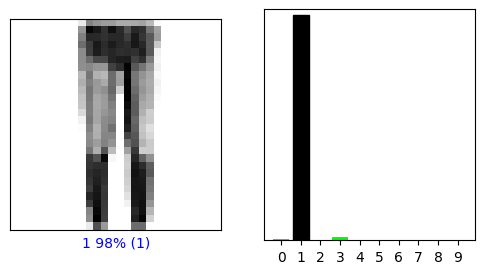




--> Imagen 5



6


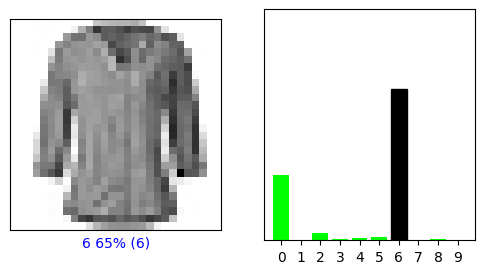




--> Imagen 6



1


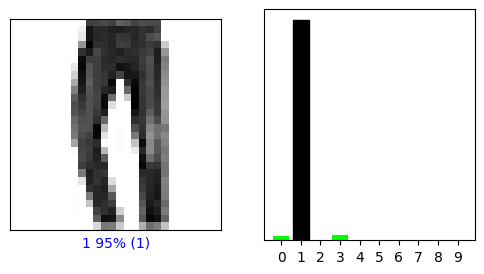




--> Imagen 7



4


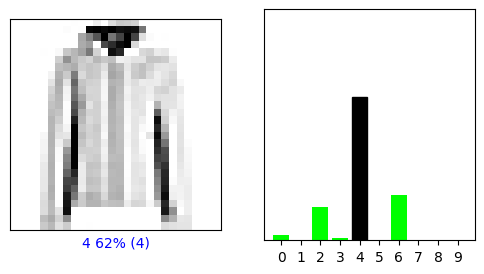




--> Imagen 8



6


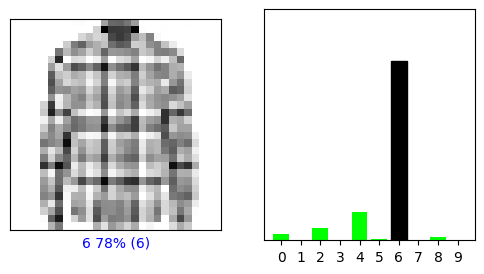




--> Imagen 9



5


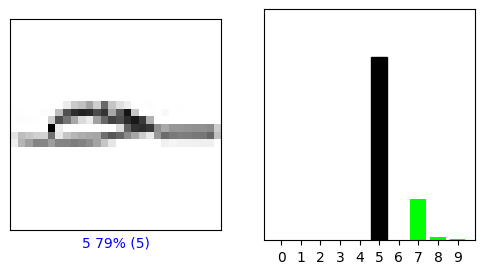

In [82]:
print('\n' + '-'*60 + '\n')
print('MODELO 4')
print('\n' + '-'*60 + '\n')
predictions = resultados[3] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])



Este 4º modelo tiene un 100 % de aciertos, igual que el primer y segundo modelo.
En este caso, si observamos la segunda imagen, vemos como diferencia muy bien las clases mas parecidas, dandole un 94 % a la clase pullover, y porcentajes mínimos a coat y shirt.


------------------------------------------------------------

MODELO 5

------------------------------------------------------------




--> Imagen 1



9


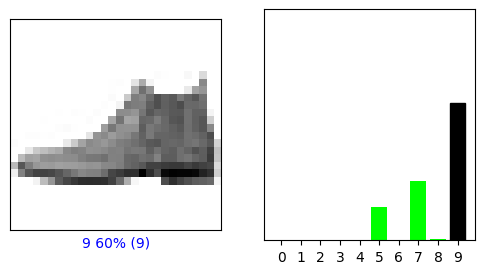




--> Imagen 2



2


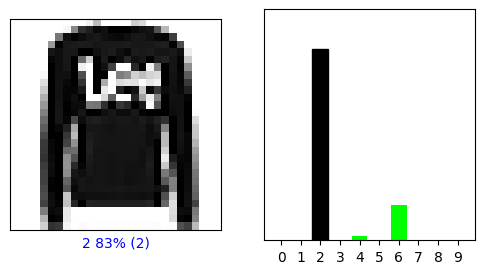




--> Imagen 3



1


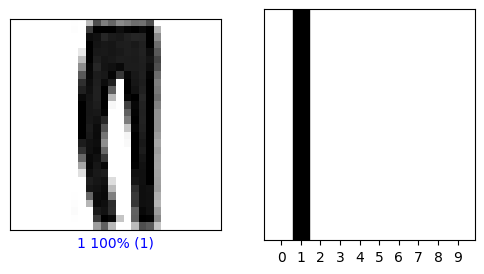




--> Imagen 4



1


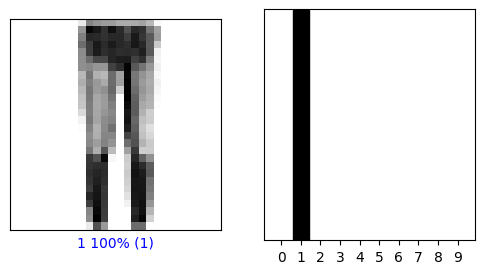




--> Imagen 5



6


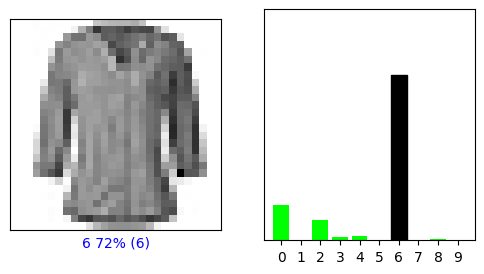




--> Imagen 6



1


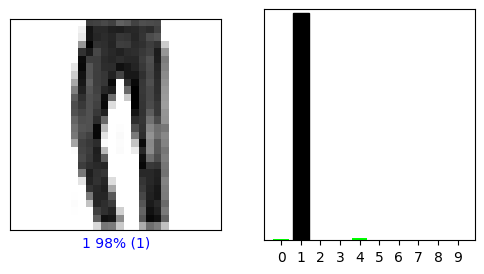




--> Imagen 7



4


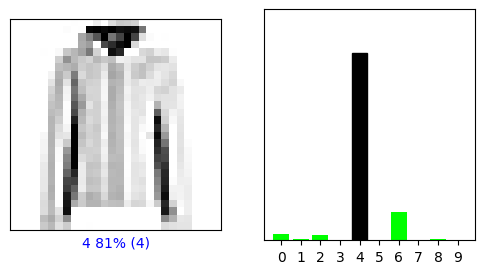




--> Imagen 8



6


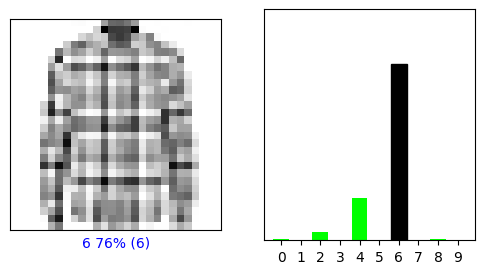




--> Imagen 9



5


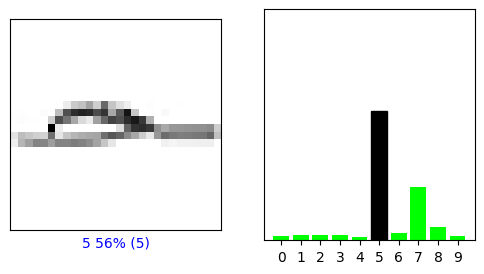

In [83]:
print('\n' + '-'*60 + '\n')
print('MODELO 5')
print('\n' + '-'*60 + '\n')
predictions = resultados[4] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])



Este 5º modelo no falla en ninguna de sus predicciones. Además las realiza en su mayoria con porcentajes muy altos, especialmente los pantalones, en los que en este caso no baja del 99 %.


------------------------------------------------------------

MODELO 6

------------------------------------------------------------




--> Imagen 1



9


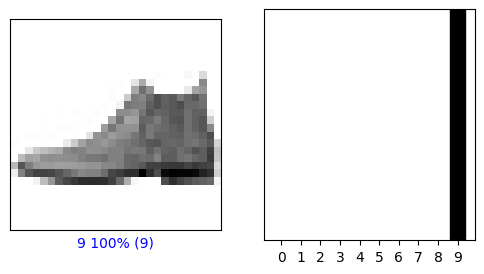




--> Imagen 2



2


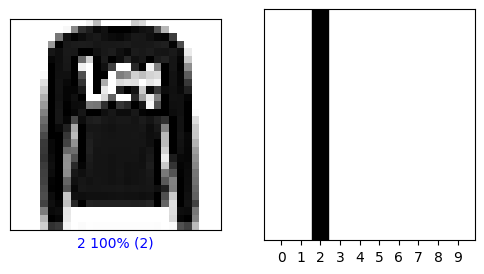




--> Imagen 3



1


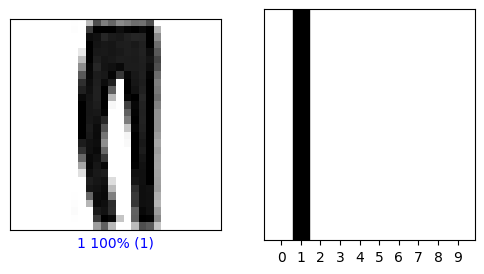




--> Imagen 4



1


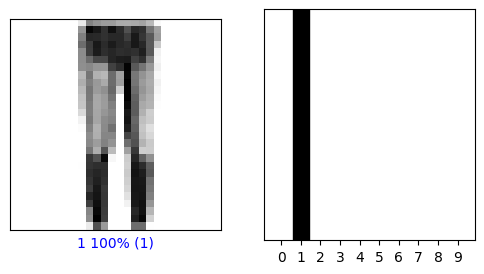




--> Imagen 5



6


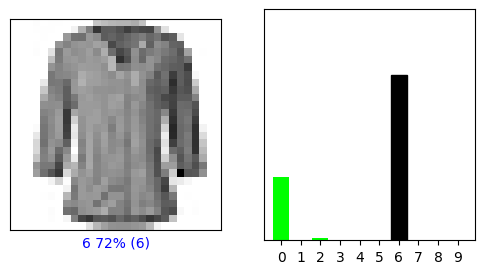




--> Imagen 6



1


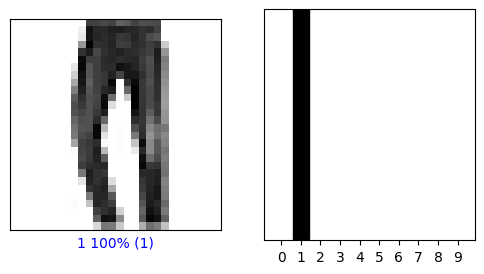




--> Imagen 7



4


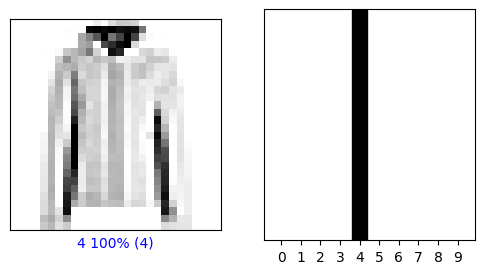




--> Imagen 8



6


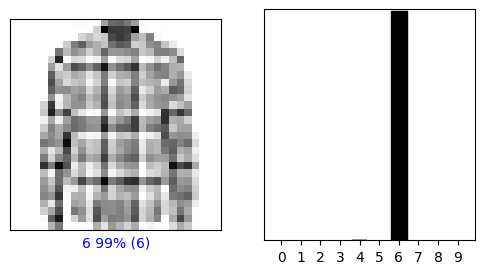




--> Imagen 9



5


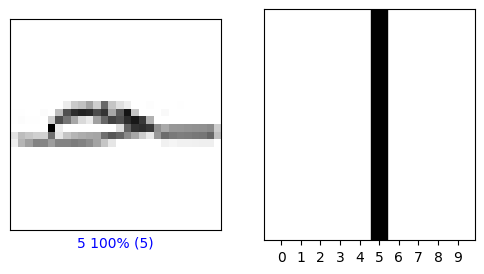

In [84]:
print('\n' + '-'*60 + '\n')
print('MODELO 6')
print('\n' + '-'*60 + '\n')
predictions = resultados[5] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])



Este modelo predice todas las imágenes correctamente. Especialmente debemos destacar dos de ellas, la primera y novena imagen las acierta con un 100 %, lo cual no había ocurrido con ningun modelo en ninguno de los dos casos.

Estas dos imágenes son sandal, y sneaker, fácilmente confundibles por el resto de modelos.


------------------------------------------------------------

MODELO 7

------------------------------------------------------------




--> Imagen 1



9


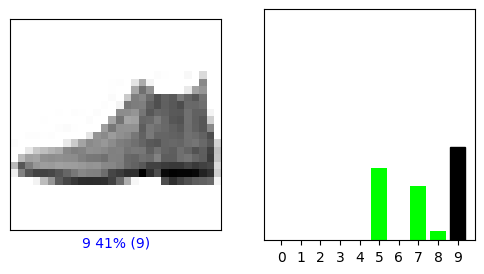




--> Imagen 2



2


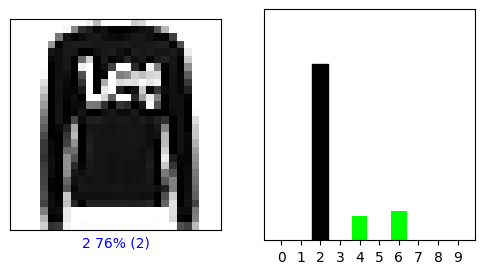




--> Imagen 3



1


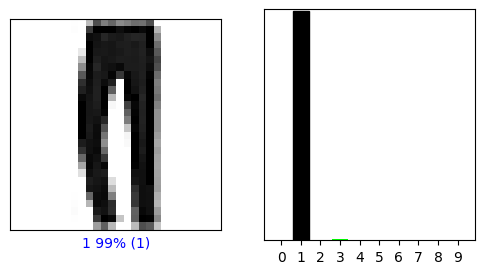




--> Imagen 4



1


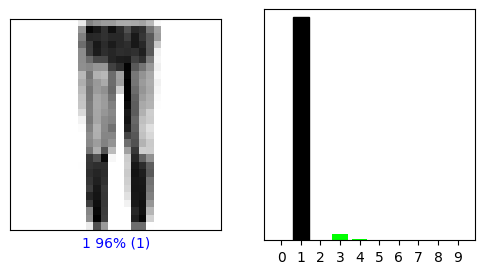




--> Imagen 5



6


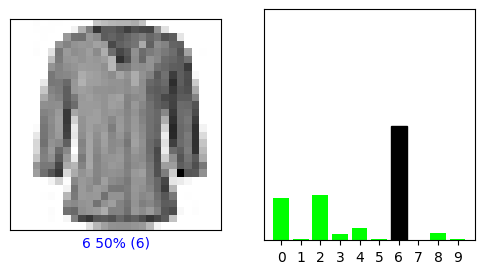




--> Imagen 6



1


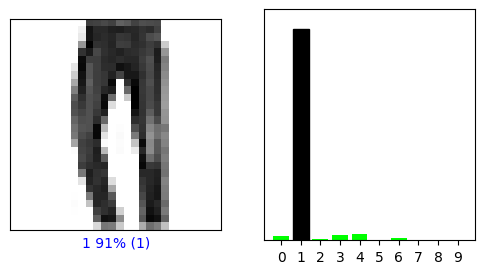




--> Imagen 7



4


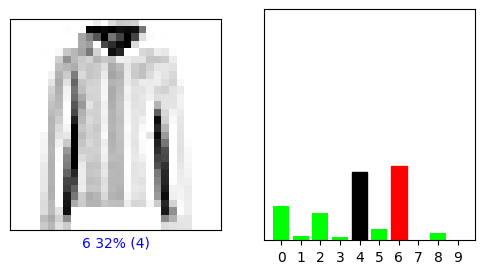




--> Imagen 8



6


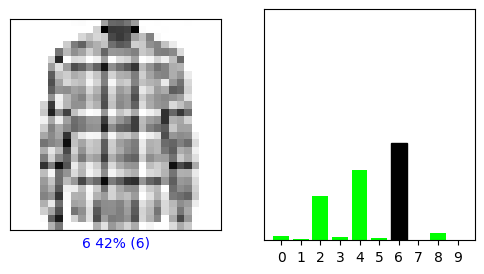




--> Imagen 9



5


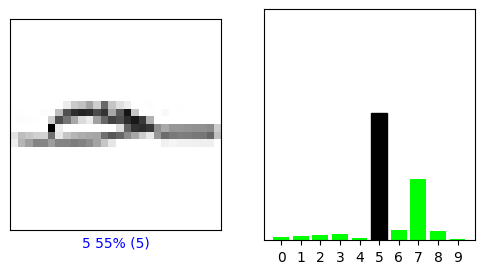

In [85]:
print('\n' + '-'*60 + '\n')
print('MODELO 7')
print('\n' + '-'*60 + '\n')
predictions = resultados[6] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])



Este modelo predice en su mayoria bien las pruebas, sin embargo se observa como junto con el modelo 3 es el que tiene porcentajes más bajos. Los porcentajes más bajos son en este caso los de sandal y sneaker.


------------------------------------------------------------

MODELO 8

------------------------------------------------------------




--> Imagen 1



9


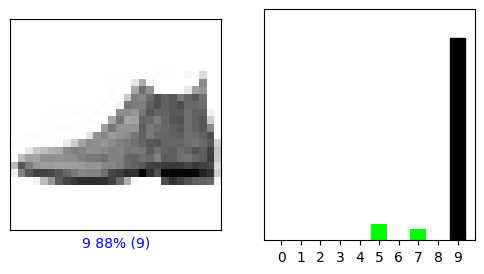




--> Imagen 2



2


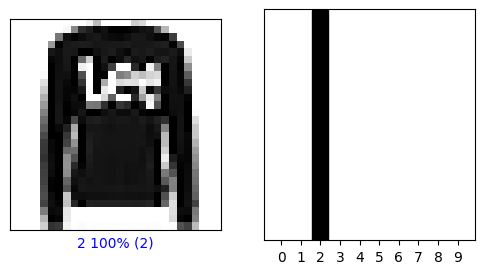




--> Imagen 3



1


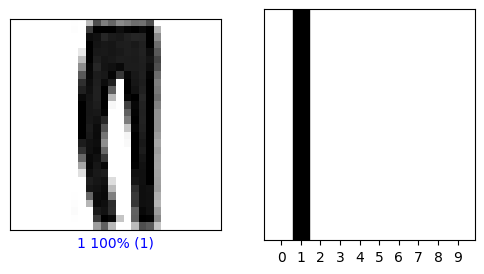




--> Imagen 4



1


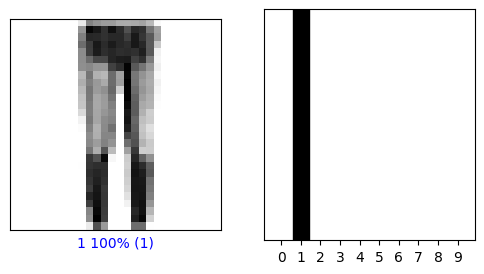




--> Imagen 5



6


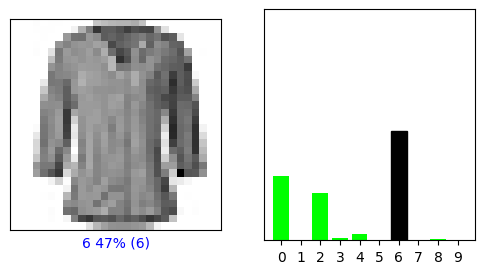




--> Imagen 6



1


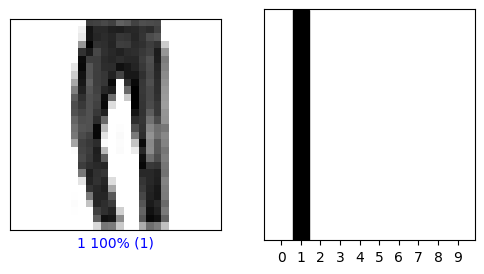




--> Imagen 7



4


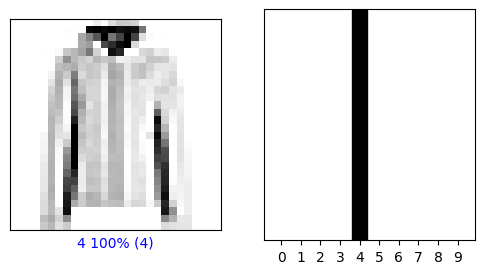




--> Imagen 8



6


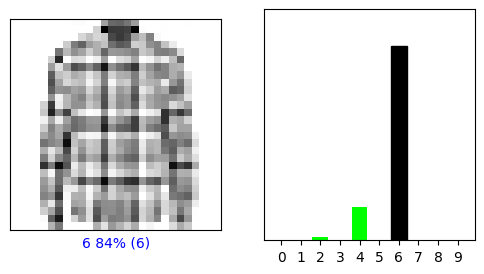




--> Imagen 9



5


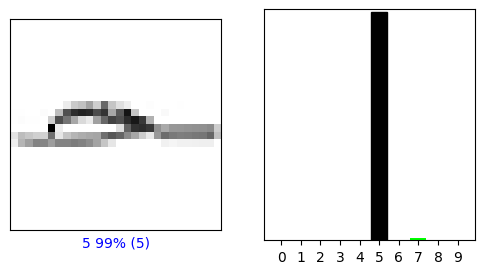

In [86]:
print('\n' + '-'*60 + '\n')
print('MODELO 8')
print('\n' + '-'*60 + '\n')
predictions = resultados[7] # Le damos como valor al vector "pedictions" todas las predicciones de todas las imagenes del modelo correspondiente, este vector se borrará y tomará un nuevo valor  en cada vuelta del bucle
for j in range (0,9): # Creamos un bucle que recorra las 10 primeras imagenes de cada caso
  print('\n''\n')
  print (f"--> Imagen {j+1}")
  print('\n''\n')
  plot_result(test_images[j], predictions[j], test_labels[j])



Podríamos decir que este último es el que mejores predicciones ha hecho. Pues con todas las predicciones acertadas, es el modelo que tiene los porcentajes más altos de media.


**MODELO CON ADAM (P7)**

Para finalizar la práctica, creamos, entrenamos y evaluamos un modelo muy similar a los anteriores, con dos cambios significativos:

*Adam (Adaptive Moment Estimation)*: este algoritmo de optimización combina las ventajas de RMSprop y Momentum buscando mejorar el proceso de aprendizaje de la red.Se caracteriza porque no emplea una tasa de aprendizaje constante para todos los parámetros, sino que adapta la tasa de aprendizaje para cada uno de ellos. Este cálculo lo realiza en función de la estimación del momento y de la magnitud del gradiente.

Consecuencia: el modelo se ajusta de forma más eficiente y efectiva a los datos de entrenamiento, lo que supone valores de prediccion más altos.


*Sparse categorical crossentropy*: esta función de perdida se suele emplear en problemas con una alta cantidad de clases. Lo que ocurre es que si hay muchas claes, habrá también muchas clases con probabilidad 0, por lo que se hacen cálculos innecesarios. Se utiliza esta función de pérdida para evitar esos cálculos y acelerar el proceso.

Como conclusión entendemos que para nuestro problema, con estas dos variaciones, la eficiencia del modelo debe mejorar, veámoslo:


In [87]:
from keras.layers import Flatten
network = models.Sequential()

# Agregar la capa Flatten al modelo
network.add(Flatten(input_shape=(28, 28)))

# Agregamos una capa con 10 neuronas y activación ReLU
network.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))

# Agregamos la capa de salida con 10 neuronas (para clasificación de 10 clases) y activación softmax
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
network.summary()

# ENTRENAMIENTO DEL MODELO:
network.fit(train_images, train_labels, epochs=5, batch_size=72)

# EVALUACIÓN DEL MODELO:
(test_loss, test_acc) = network.evaluate(test_images, test_labels)

# PREDICCIONES CON IMAGENES DE TEST
predictions = network.predict(test_images)
print(predictions[i])

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_38 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 10)                7850      
                                                                 
 dense_77 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
834/834 [==============================] - 2s 2ms/step - loss: 1.2685 - accuracy: 0.6413
Epoch 2/5
834/834 [==============================] - 2s 3ms/step - loss: 0.7201 - accuracy: 0.7930
Epoch 3/5
834/834 [==============================] - 2s 2ms/step - loss: 0.5628 - acc

Efectivamente la precisión del modelo 3 que era muy baja ha mejorado. La precisión de acierto ha pasado de 0.71 a 0.82 en la evaluación de imágenes test. Un crecimiento de 0.1 es una gran mejora, por lo que corroboramos que estas dos variaciones han implemanetado notablemente nuestro modelo.

## **Organización del proyecto**
La práctica ha supuesto un reto para nosotras. Comenzamos con el código, que realizamos basándonos en la práctica del primer ejemplo de una red neuronal. Con eso ya teníamos la base para empezar a analizar el proyecto y desarrollar la memoria.
Al querer ejecutar los 8 modelos hubo algunas complicaciones, optamos por multiples opciones, como un swich un bucle, hasta que dimos con la idea de la función. La función nos facilito y optimizó el porceso pero a su vez fue mas difícil de identificar que varibales tendrían que salir de la funcion para luego poder llegar a graficar ya que al tener que ejecutar 10 veces cada modelo no podíamos graficar dentro de la función.
Tras conseguir superar el mayor obstáculo nuestra siguiente tarea fue implementar nuestra red neuronal para poder realizar los ejercicios requeridos en la práctica, los metodos usados los redactamos posteriormente asi como interpetamos los resultdos obtenidos.


La gran parte del trabajo la hemos realizado juntas en varias reuniones a lo largo de la semana. Estamos bastante acostumbadas a trabajar en grupo y sabemos los fuertes de cada una pero sobre todo sabemos organizarnos para que el trabajo que no podemos hacer en las reuniones quede repatido de forma equitativa.

Exactamente no sabriamos decir que ha hecho cada una porque aunque inevitablemente alguna le ha dedicado mas tiempo a una cosa u otra siempre ha participado para ayudar o completar el trabajo de otra.

En resumen Lucía y Julia se han dedicado mayoritariamente a la creación de la red neuronal aunque también han formado parte del análisis de resultados de la red, mientras que Susana ha dedicado más tiempo a el análisis de resultados pero, a su vez ha trabajado con la creación de la red neuronal. Pero como ya hemos mencionado antes el trabajo se ha hecho a lo largo de varias reuniones, todas participando en todo.

> ## **Conclusión**

En esta práctica hemos llevado a cabo a un análisis detallado de la construcción, entrenamiento y evaluación de los modelos de RNA para la clasificación de prendas de vestir. La experimentación con diversos parámetros a lo largo del trabajo nos ha permitido identificar la variación del rendimiento de la red neuronal a través de distintas configuraciones.    

Se observó que los modelos con la función de activación ReLU, especialmente en combinación con el optimizador RMSprop, mostraron un rendimiento notablemente fuerte. Además, aumentar el número de neuronas en la primera capa a 512 demostró ser beneficioso en comparación con modelos con solo 10 neuronas.

En términos de evaluación en el conjunto de prueba, la mayoría de los modelos lograron una precisión de acierto superior al 80%, indicando una buena capacidad de generalización a datos no vistos previamente. Además, no se observaron signos de sobreajuste, ya que la precisión en el conjunto de prueba fue coherente con la precisión en el conjunto de entrenamiento.

Las predicciones para la sexta imagen del conjunto de prueba fueron consistentes entre todos los modelos, destacando la capacidad de clasificación eficaz incluso para casos específicos. Las visualizaciones de las predicciones para las primeras diez imágenes del conjunto de prueba revelaron la capacidad de los modelos para diferenciar con precisión entre diversas clases de prendas de vestir, con altos porcentajes de confianza en las predicciones correctas.

Un punto a destacar fue la mejora sustancial en la precisión al introducir el optimizador Adam y la función de pérdida "sparse categorical crossentropy" en un modelo adicional, que alcanzó un 82% en la evaluación del conjunto de prueba. Esta mejora destaca la importancia de seleccionar cuidadosamente los algoritmos de optimización y las funciones de pérdida para lograr un rendimiento óptimo en tareas específicas de clasificación.




> ## **Bibliografía**

- "Función de Activación ReLU en Aprendizaje Automático". [Enlace](https://datascience.eu/es/aprendizaje-automatico/funcion-de-activacion-relu/)

- "Función de Activación en Redes Neuronales". [Enlace](https://www.diegocalvo.es/funcion-de-activacion-redes-neuronales/)

- "Explicación Funciones de Activación y Práctica con Python". [Enlace](https://rubialesalberto.medium.com/explicaci%C3%B3n-funciones-de-activaci%C3%B3n-y-pr%C3%A1ctica-con-python-5807085c6ed3)

- "Las Matemáticas del Machine Learning: Funciones de Activación". [Enlace](https://telefonicatech.com/blog/las-matematicas-del-machine-learning-funciones-de-activacion)

- "Tutorial de Deep Learning: Función de Activación". [Enlace](https://interactivechaos.com/es/manual/tutorial-de-deep-learning/funcion-de-activacion)

- "Clasificación de Imágenes Médicas". [Enlace](https://repositorio.unican.es/xmlui/bitstream/handle/10902/22455/CriachFernandezPaula_TFGFisica_Clasificacion_Imagenes_Medicas.pdf?sequence=1)